Grafico salvato in: img_output/distribution_dirichlet_0_8.pdf


/home/user/fl-tesi-xgboost/venv/lib/python3.12/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


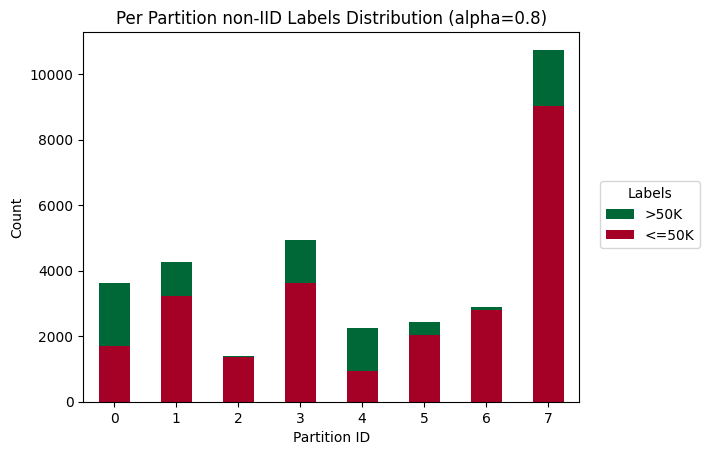

In [ ]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions
import os

output_dir = "img_output"
os.makedirs(output_dir, exist_ok=True)

fds = FederatedDataset(
    dataset="scikit-learn/adult-census-income",
    partitioners={
        "train": DirichletPartitioner(
            num_partitions=8,
            partition_by="income",
            alpha=0.8,
            seed=45,
        ),
    },
)

partitioner = fds.partitioners["train"]

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="income",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition non-IID Labels Distribution (alpha=0.8)",
)

output_path = os.path.join(output_dir, "distribution_dirichlet_0_8.pdf")
fig.savefig(output_path, format='pdf', bbox_inches='tight')

Grafico salvato in: img_output/distribution_iid.pdf


/home/user/fl-tesi-xgboost/venv/lib/python3.12/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(


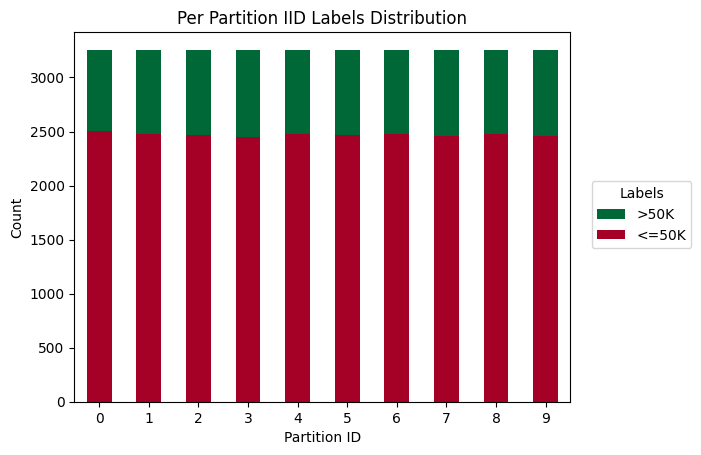

In [ ]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner, IidPartitioner
from flwr_datasets.visualization import plot_label_distributions
import os

output_dir = "img_output"
os.makedirs(output_dir, exist_ok=True)

fds = FederatedDataset(
    dataset="scikit-learn/adult-census-income",
    partitioners={
        "train": IidPartitioner(
            num_partitions=10,
        ),
    },
)

partitioner = fds.partitioners["train"]

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="income",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition IID Labels Distribution",
)

output_path = os.path.join(output_dir, "distribution_iid.pdf")
fig.savefig(output_path, format='pdf', bbox_inches='tight')